In [1]:
import numpy as np
import pandas as pd
import os
import nibabel as nib
import nilearn as nl

In [2]:
path = r"/mnt/k/Abide Dataset/ABIDEII-EMC_1/29864/session_1/rest_1/rest.nii"

In [3]:
# Load the NIfTI file
nii_file = nib.load(path)

# Get the data array
data = nii_file.get_fdata()

# Print some details about the file
print(f"Shape of the data: {data.shape}")
print(f"Data type: {data.dtype}")


Shape of the data: (64, 64, 37, 160)
Data type: float64


In [4]:
# Get the header information
header = nii_file.header

# Print voxel dimensions (pixdim)
print(header)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 48
dim             : [  4  64  64  37 160   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         3.5938     3.5938127  4.000014   2.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 36
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 113.203
qoffset_y       : -79.75474
qoffse

In [5]:
# import numpy as np
# from nilearn.connectome import ConnectivityMeasure

# # Calculate correlation between the regions
# correlation_measure = ConnectivityMeasure(kind='correlation')
# correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# # Binarize or threshold the correlation matrix to form the graph (optional)
# threshold = 0.5
# adjacency_matrix = np.where(correlation_matrix > threshold, 1, 0)


In [6]:
from nilearn import input_data, NiftiMasker

ImportError: cannot import name 'NiftiMasker' from 'nilearn' (/root/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/nilearn/__init__.py)

In [ ]:
from nilearn.glm.first_level import glover_hrf
hrf_model = glover_hrf(tr=2.0)  # Example with TR = 2s



In [7]:
from nilearn.input_data import NiftiMasker
from nilearn import image
import matplotlib.pyplot as plt
from nilearn import datasets
mni_mask = datasets.fetch_icbm152_brain_gm_mask()
fmri_img = image.load_img(path)

/root/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/root/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/joblib/memory.py:312: UserWarning: Casting data from int16 to float32
  return self.func(*args, **kwargs)


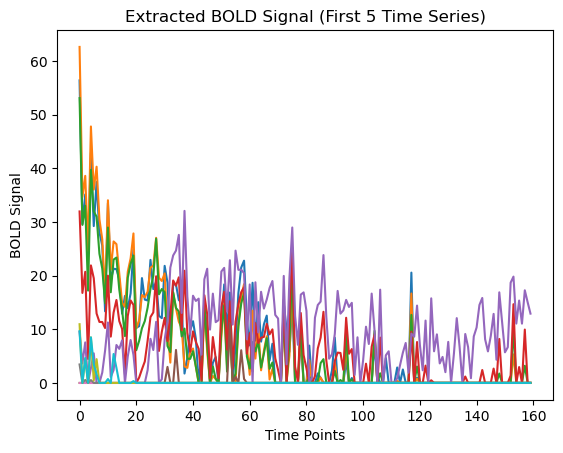

In [8]:

# Initialize NiftiMasker with optional mask
masker = NiftiMasker(mask_img=mni_mask)

# Fit the masker and transform the fMRI image to extract time series
time_series = masker.fit_transform(fmri_img)

# Plot the first few time series as an example
plt.plot(time_series[:, :10])
plt.title("Extracted BOLD Signal (First 5 Time Series)")
plt.xlabel("Time Points")
plt.ylabel("BOLD Signal")
plt.show()



In [25]:
time_series.shape

(160, 1529112)

In [ ]:
type(time_series)

In [ ]:
time_series.ndim

In [9]:
import pandas as pd

In [18]:
table = pd.read_csv("/mnt/k/Abide Dataset/ABIDEII-EMC_1_CSV.csv")

In [20]:
table.head()

,SITE_ID,SUB_ID,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,...,ADI_R_C3_TOTAL,ADI_R_C4_REPETITIVE_USE_OBJECTS,ADI_R_C4_HIGHER,ADI_R_C4_UNUSUAL_SENSORY_INTERESTS,ADI_R_C4_TOTAL,ADI_R_D_AGE_PARENT_NOTICED,ADI_R_D_AGE_FIRST_SINGLE_WORDS,ADI_R_D_AGE_FIRST_PHRASES,ADI_R_D_AGE_WHEN_ABNORMALITY,ADI_R_D_INTERVIEWER_JUDGMENT
0,ABIDEII-EMC_1,29864,NaN,1,NaN,NaN,9.013005,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABIDEII-EMC_1,29865,NaN,1,NaN,NaN,10.663929,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABIDEII-EMC_1,29866,NaN,1,NaN,NaN,8.720055,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABIDEII-EMC_1,29867,NaN,1,NaN,NaN,8.517454,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABIDEII-EMC_1,29868,NaN,1,NaN,NaN,10.650240,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
table.shape

(54, 348)

In [21]:
table.columns

Index(['SITE_ID', 'SUB_ID', 'NDAR_GUID', 'DX_GROUP', 'PDD_DSM_IV_TR',
       'ASD_DSM_5', 'AGE_AT_SCAN ', 'SEX', 'HANDEDNESS_CATEGORY',
       'HANDEDNESS_SCORES',
       ...
       'ADI_R_C3_TOTAL', 'ADI_R_C4_REPETITIVE_USE_OBJECTS', 'ADI_R_C4_HIGHER',
       'ADI_R_C4_UNUSUAL_SENSORY_INTERESTS', 'ADI_R_C4_TOTAL',
       'ADI_R_D_AGE_PARENT_NOTICED', 'ADI_R_D_AGE_FIRST_SINGLE_WORDS',
       'ADI_R_D_AGE_FIRST_PHRASES', 'ADI_R_D_AGE_WHEN_ABNORMALITY',
       'ADI_R_D_INTERVIEWER_JUDGMENT'],
      dtype='object', length=348)

In [24]:
table.describe()

,SUB_ID,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,...,ADI_R_C3_TOTAL,ADI_R_C4_REPETITIVE_USE_OBJECTS,ADI_R_C4_HIGHER,ADI_R_C4_UNUSUAL_SENSORY_INTERESTS,ADI_R_C4_TOTAL,ADI_R_D_AGE_PARENT_NOTICED,ADI_R_D_AGE_FIRST_SINGLE_WORDS,ADI_R_D_AGE_FIRST_PHRASES,ADI_R_D_AGE_WHEN_ABNORMALITY,ADI_R_D_INTERVIEWER_JUDGMENT
count,54.000000,0.0,54.000000,0.0,0.0,54.000000,54.000000,54.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,29890.500000,NaN,1.500000,NaN,NaN,8.098664,1.185185,1.203704,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,15.732133,NaN,0.504695,NaN,NaN,1.087599,0.392095,0.406533,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,29864.000000,NaN,1.000000,NaN,NaN,6.212183,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29877.250000,NaN,1.000000,NaN,NaN,7.199179,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,29890.500000,NaN,1.500000,NaN,NaN,8.156057,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,29903.750000,NaN,2.000000,NaN,NaN,8.826831,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,29917.000000,NaN,2.000000,NaN,NaN,10.663929,2.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
